In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.sparse import csr_matrix

In [2]:
data = pd.read_csv('SpotifyFeatures.csv')
data

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# EDA (Exploratory Data Analysis)

In [3]:
# As usual,any data science or machine learning project starts with an exploratory data analysis (EDA). 
# The aim of EDA is to understand and get insights on our data.

In [4]:
data.size

4189050

In [5]:
data.shape

(232725, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
232720    False
232721    False
232722    False
232723    False
232724    False
Length: 232725, dtype: bool

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [10]:
data.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


# Total Observations in the Dataset

In [11]:
# we'll check how many observions, there are in the dataset.
# Get total observations

print(f"There are {data.shape[0]} observations in the dataset") 

There are 232725 observations in the dataset


# Let's start exploring some characteristics of the dataset:-

In [12]:
data.nunique() 

genre                   27
artist_name          14564
track_name          148615
track_id            176774
popularity             101
acousticness          4734
danceability          1295
duration_ms          70749
energy                2517
instrumentalness      5400
key                     12
liveness              1732
loudness             27923
mode                     2
speechiness           1641
tempo                78512
time_signature           5
valence               1692
dtype: int64

# Unique songs:-

In [13]:
unique_songs = data['popularity'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 101 unique songs in the dataset


In [14]:
data['popularity'].unique() 

array([  0,   1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,
        63,  62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,
        57,  59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,
        33,  25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,
        73,  78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,
        47,  48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,
        34,  32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,
        96,  86,  85,  84,  94,  82,  79,  27,  30,  98], dtype=int64)

In [15]:
data["duration_sec"]= data["duration_ms"].apply(lambda x: round(x/1000))
data.drop("duration_ms", inplace=True, axis=1)
data['duration_sec'].head()   #Convert Duration From ms To Sec

0     99
1    137
2    170
3    152
4     83
Name: duration_sec, dtype: int64

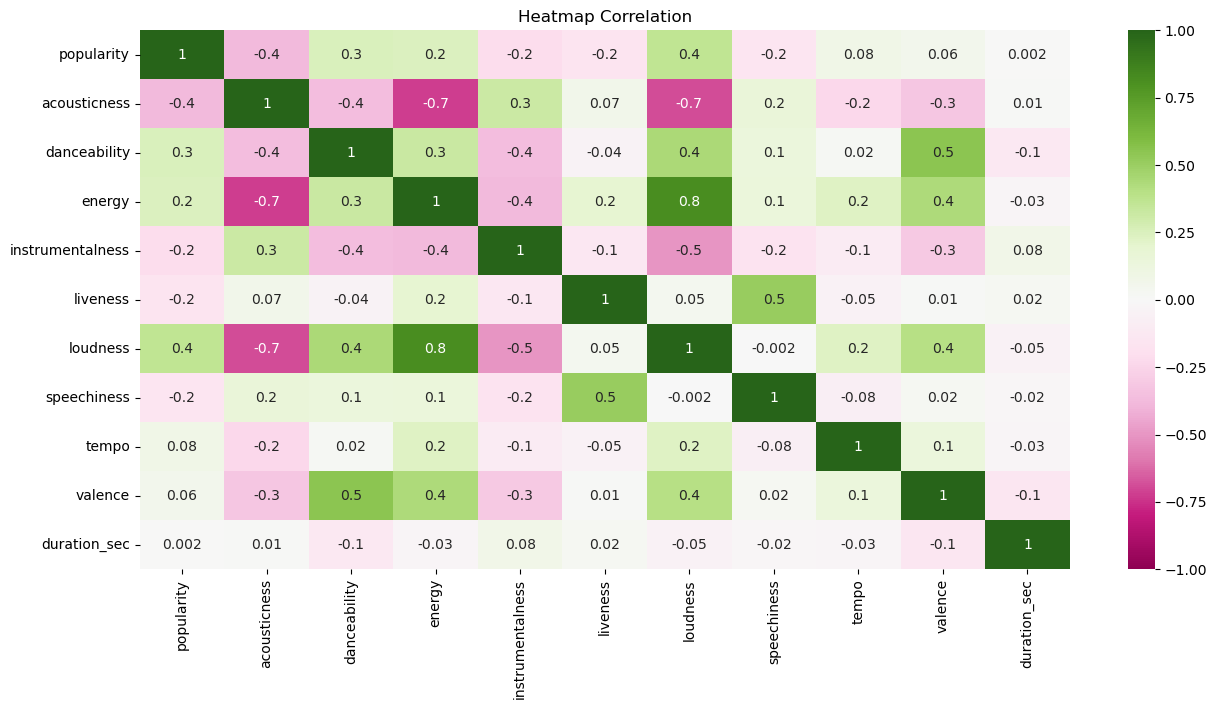

In [16]:
data_corr = data.drop(["key", "mode"], axis=1).corr()
plt.figure(figsize=(15,7))
heatmap = sns.heatmap(data_corr, annot=True, fmt=".1g", vmin=-1, vmax=1, cmap="PiYG",linecolor="black")
heatmap.set_title("Heatmap Correlation")
plt.show()

###             here we can see that loudness and energy are highly correlated

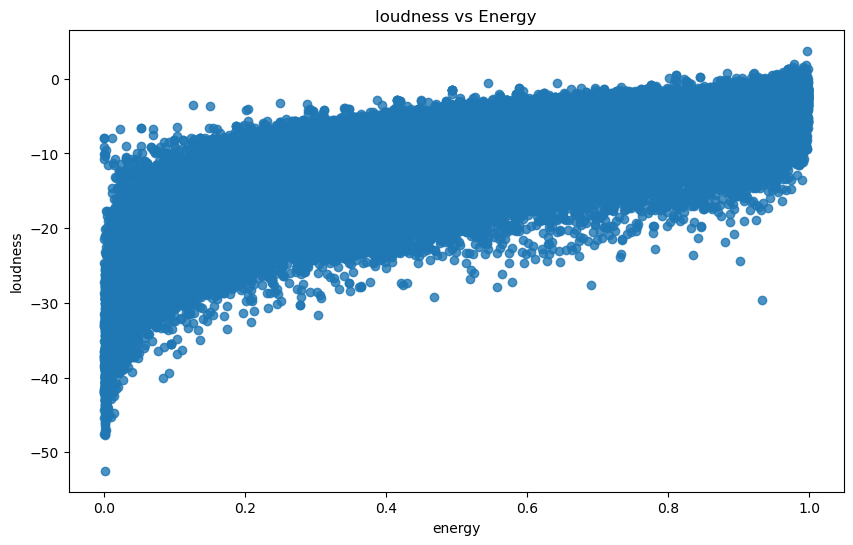

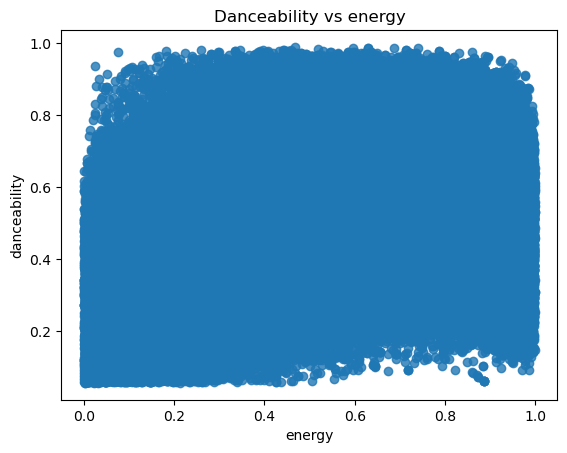

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data =data, y= "loudness", x = "energy").set(title="loudness vs Energy")
plt.show()
sns.regplot(data =data, y= "danceability", x = "energy").set(title="Danceability vs energy")
plt.show()


In [18]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'duration_sec'],
      dtype='object')

In [19]:
len(data.columns)

18

In [20]:
data['popularity'].describe()

count    232725.000000
mean         41.127502
std          18.189948
min           0.000000
25%          29.000000
50%          43.000000
75%          55.000000
max         100.000000
Name: popularity, dtype: float64

In [21]:
data['popularity'].value_counts()

0      6312
50     5415
53     5414
51     5401
52     5342
       ... 
96        8
94        7
99        4
98        3
100       2
Name: popularity, Length: 101, dtype: int64

In [22]:
data['popularity'].unique()

array([  0,   1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,
        63,  62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,
        57,  59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,
        33,  25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,
        73,  78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,
        47,  48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,
        34,  32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,
        96,  86,  85,  84,  94,  82,  79,  27,  30,  98], dtype=int64)

In [23]:
data['popularity'].value_counts(bins=[0,25,50,75,100])

(25.0, 50.0]      107246
(50.0, 75.0]       76646
(-0.001, 25.0]     45877
(75.0, 100.0]       2956
Name: popularity, dtype: int64

In [24]:
data["genre"].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [25]:
data['genre'].describe()

count     232725
unique        27
top       Comedy
freq        9681
Name: genre, dtype: object

In [26]:
len(data['genre'].unique())

27

In [27]:
data['genre'].value_counts().head(10)

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: genre, dtype: int64

In [28]:
data['danceability'].describe()

count    232725.000000
mean          0.554364
std           0.185608
min           0.056900
25%           0.435000
50%           0.571000
75%           0.692000
max           0.989000
Name: danceability, dtype: float64

In [29]:
data['danceability'].value_counts()

0.5970    558
0.5470    544
0.5890    542
0.6100    542
0.6220    540
         ... 
0.0922      1
0.9700      1
0.0868      1
0.0572      1
0.0570      1
Name: danceability, Length: 1295, dtype: int64

In [30]:
data['duration_sec'].unique()

array([  99,  137,  170, ..., 1204,  811, 1412], dtype=int64)

### For time_signature

In [31]:
unique_songs = data['time_signature'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset") 

There are 5 unique songs in the dataset


In [32]:
data['time_signature'].unique() 

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [33]:
data['time_signature'].value_counts() 

4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: time_signature, dtype: int64

### Unique artists

In [34]:
unique_artists= data['artist_name'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset") 

There are 14564 unique artists in the dataset


### Unique Usres

In [35]:
unique_users= data['track_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset") 

There are 176774 unique users in the dataset


### For track_name

In [36]:
unique_users= data['track_name'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 148615 unique users in the dataset


In [37]:
data.sort_values(['popularity']) 

# Sort by popularity

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_sec
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
74954,Children's Music,Sing n Play,"See, See My Playmate",3WaCwwpGoxLEkFmd6cpZO5,0,0.1390,0.556,0.439,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820,150
74958,Children's Music,Children Songs Company,By the God - Instrumental,5yDehr9ccZo3vBO8hZXFcK,0,0.2130,0.736,0.446,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668,213
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,6NEULw7AmTOAYRunPWcFvn,0,0.0131,0.639,0.844,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271,184
74961,Children's Music,Children Songs Company,Breeze,6v126eNn1A79yFIKGfvqLz,0,0.0280,0.607,0.554,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,190
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,150
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,150
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,179


In [38]:
data.groupby('popularity')['duration_sec'].mean().sort_values(ascending=False).head()   

popularity
32    254.921059
30    254.592583
28    253.386971
34    252.838265
33    252.138428
Name: duration_sec, dtype: float64

In [39]:
most_popular = data.query('popularity>90', inplace = False).sort_values('popularity', ascending = False)
most_popular[:10]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_sec
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,179
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,179
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,190
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,150
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,150
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,190
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,193
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,193
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,193
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913,158


In [40]:
least_popular=data.query('popularity<30', inplace = False).sort_values('popularity', ascending = False)
least_popular.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_sec
130791,Classical,Johann Sebastian Bach,"Sonata for Violin Solo No. 2 in A Minor, BWV 1...",5LXkVuIQsR33qnSDDZ6giG,29,0.99200,0.500,0.162,0.006980,A,0.0502,-17.441,Minor,0.0731,83.257,4/4,0.9640,350
203636,Soundtrack,The Chamber Orchestra Of London,Us And Them,7lDrR2q6MzBsTwMWz2zyAX,29,0.90900,0.221,0.265,0.939000,D,0.1560,-13.359,Major,0.0404,179.768,3/4,0.2060,113
49609,Blues,Robert Randolph & The Family Band,Baptise Me,0XpzsfRuqtv8E9dEgRy94A,29,0.00814,0.386,0.885,0.000007,E,0.3660,-3.114,Minor,0.0479,171.621,4/4,0.5540,246
203655,Soundtrack,Piero Piccioni,It's Possible,7HWfJgLLbH5NjcghGM74tM,29,0.94600,0.369,0.259,0.000446,F,0.0784,-12.012,Major,0.0317,115.013,4/4,0.1770,295
32426,Anime,Nogizaka46,Nandomeno Aozoraka?,4wot7Q3iGAxr9bXhVMh0xA,29,0.31700,0.620,0.902,0.000000,F,0.1090,-3.822,Minor,0.0452,121.951,4/4,0.5020,290
203658,Soundtrack,Michael Giacchino,A Bridge Too Parr,0WgqMCISPm0WpprP6OPAvm,29,0.43400,0.411,0.380,0.194000,G,0.0380,-9.579,Major,0.0637,136.498,4/4,0.0989,257
203659,Soundtrack,Paul Leonard-Morgan,Mega City One,3L7FTzFCa7h8ZS07i62MkM,29,0.02830,0.269,0.399,0.839000,G,0.1310,-15.312,Major,0.0328,99.902,4/4,0.0611,193
203662,Soundtrack,Hans Zimmer,Dragon Warrior Rises,1BFjp2vvSrUyjxG451uuCS,29,0.54600,0.212,0.237,0.539000,G,0.0975,-15.989,Major,0.0416,137.320,4/4,0.0941,202
32422,Anime,MY FIRST STORY,One Light,7cAYn9T8eGyPT9IfaISuLD,29,0.03060,0.322,0.902,0.000000,F,0.1120,-4.009,Major,0.0461,180.052,4/4,0.3420,284
49615,Blues,Gov't Mule,"Sarah, Surrender",3w5lf2QiSE53PegYl45wjp,29,0.53700,0.724,0.716,0.000112,D,0.0918,-5.208,Minor,0.0308,101.008,4/4,0.7370,252


In [41]:
len(least_popular)

60339

# Data Visualisation

In [42]:
#sns.pairplot(data,hue='popularity')
#plt.show()

In [43]:
floats = []
for col in data.columns:
    if data[col].dtype == 'float':
        floats.append(col)
len(floats)

9

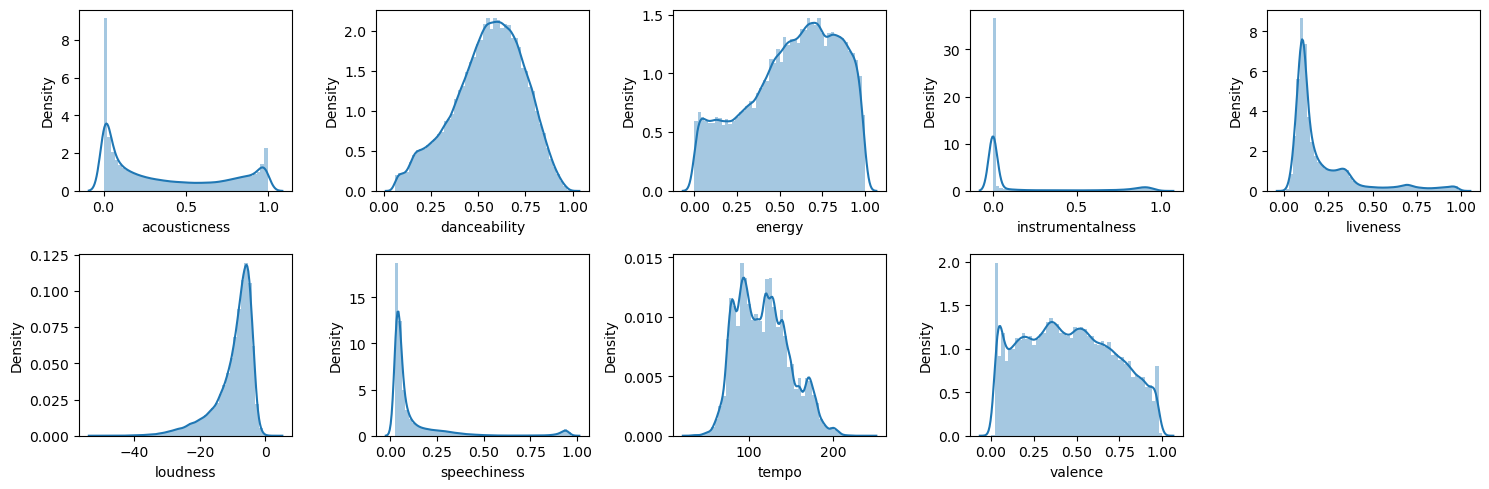

In [44]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sns.distplot(data[col])
plt.tight_layout()
plt.show()
  


---------------------------------POPULARITY-------------------------------


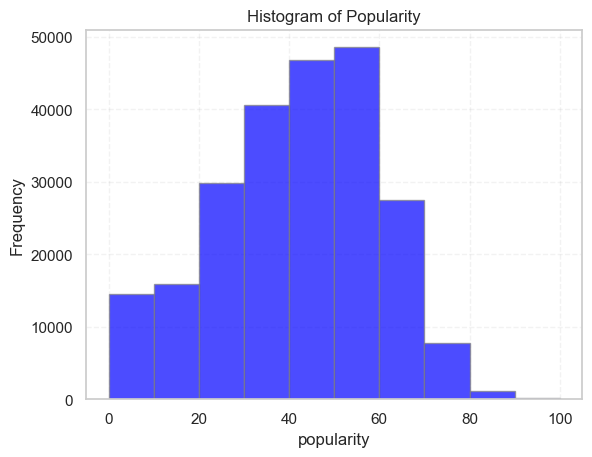

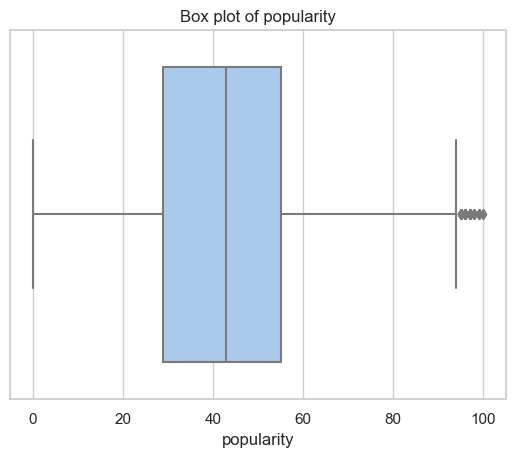

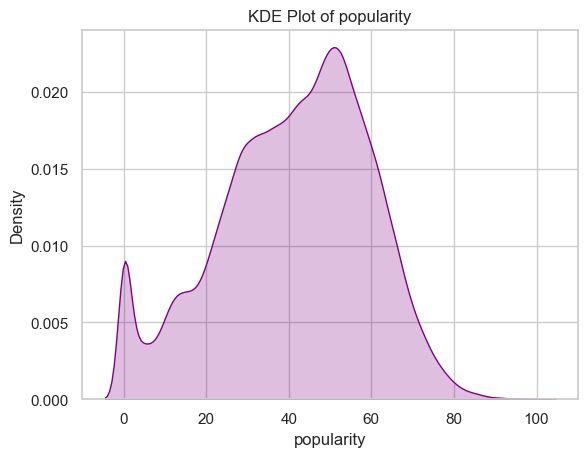

---------------------------------ACOUSTICNESS-------------------------------


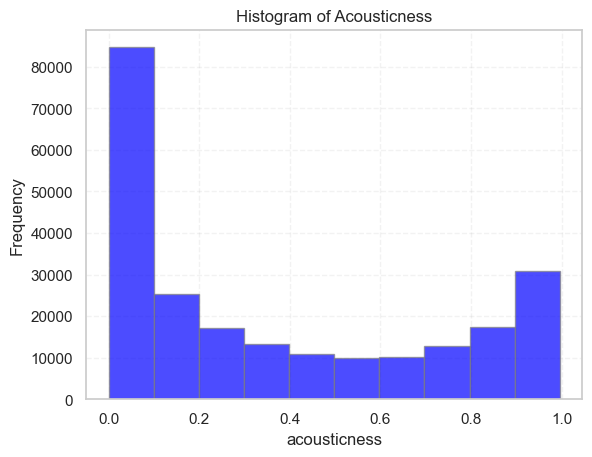

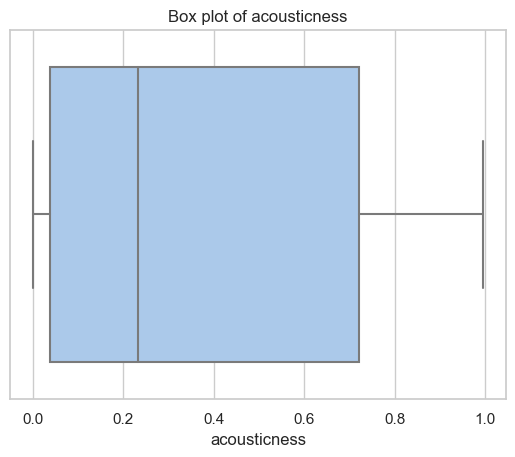

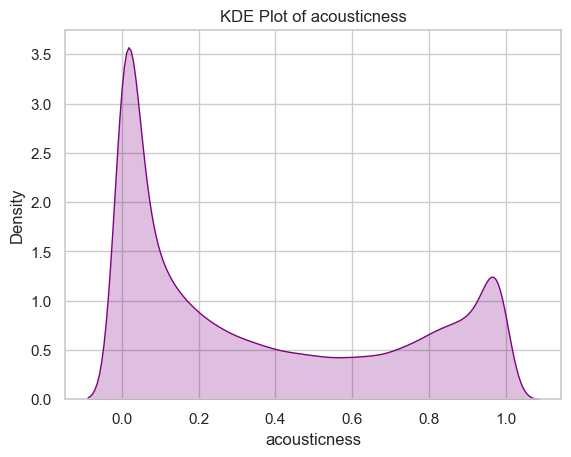

---------------------------------DANCEABILITY-------------------------------


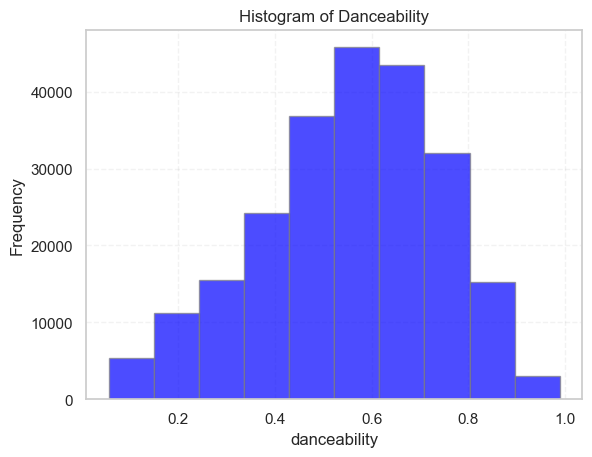

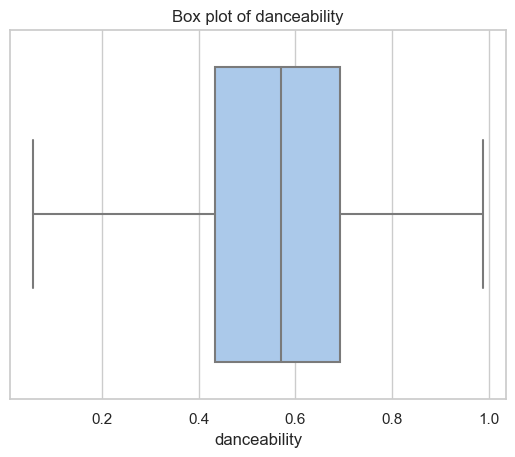

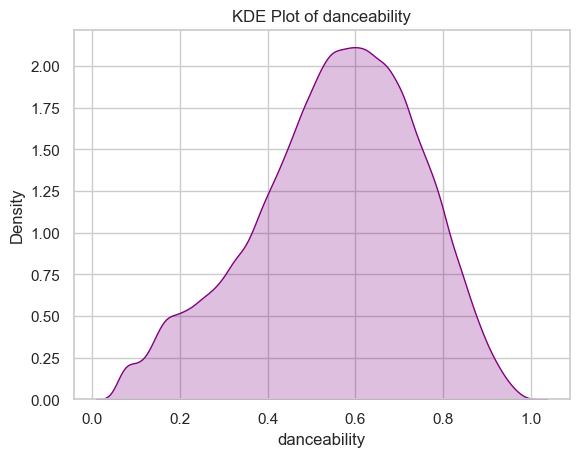

---------------------------------ENERGY-------------------------------


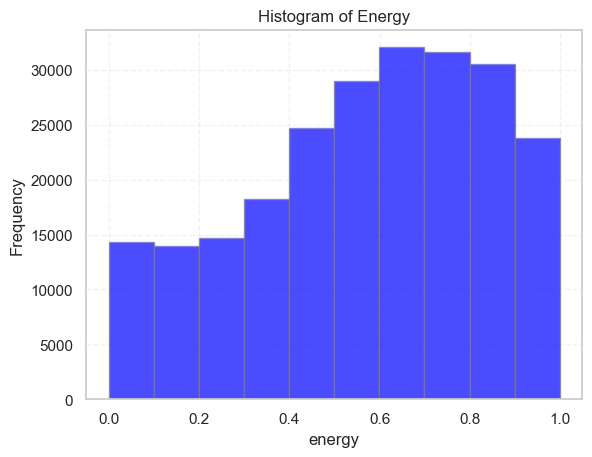

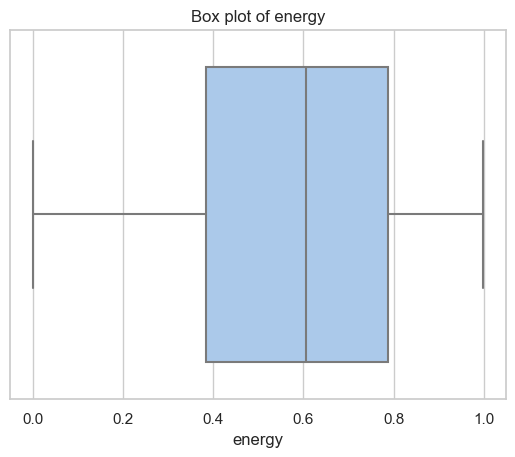

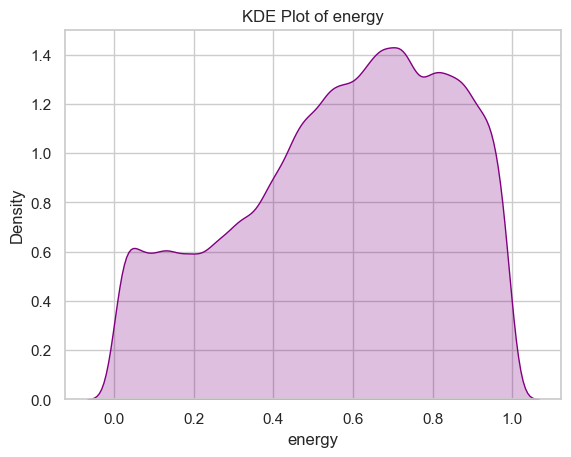

---------------------------------INSTRUMENTALNESS-------------------------------


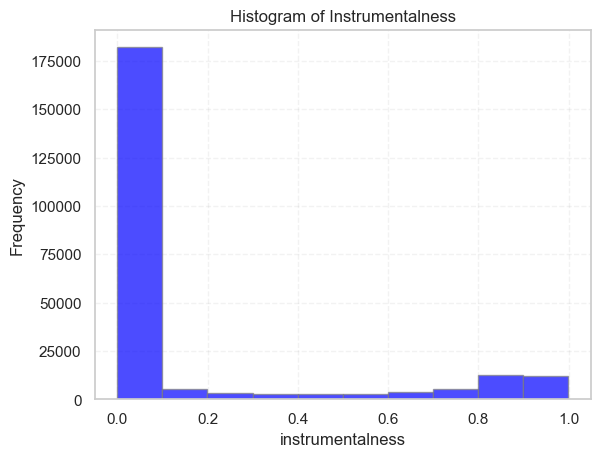

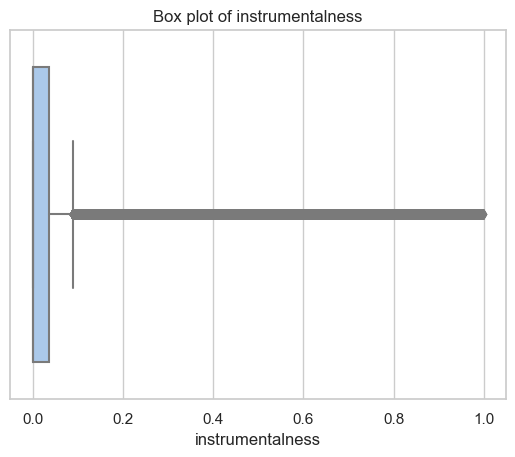

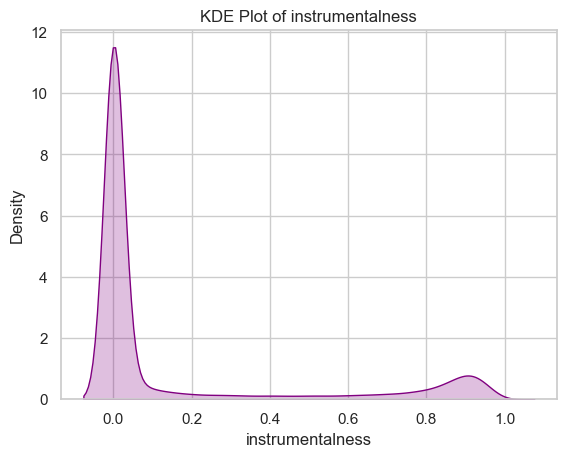

---------------------------------LIVENESS-------------------------------


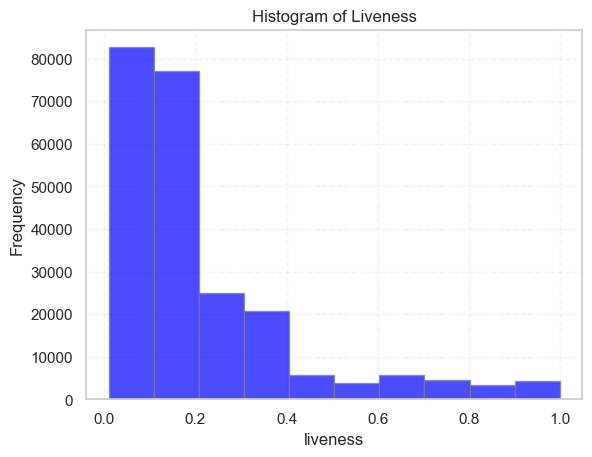

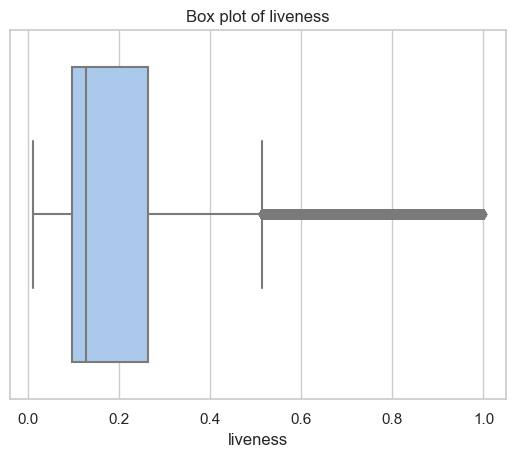

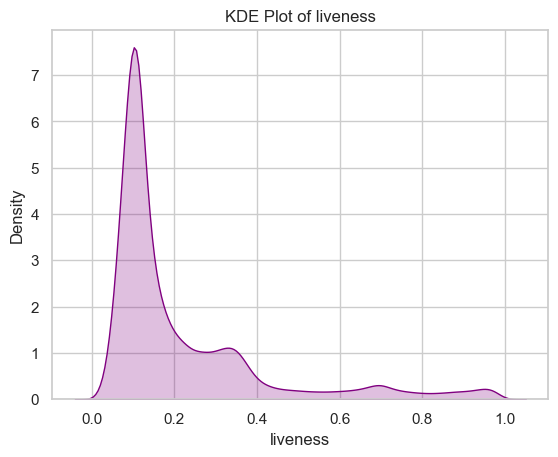

---------------------------------LOUDNESS-------------------------------


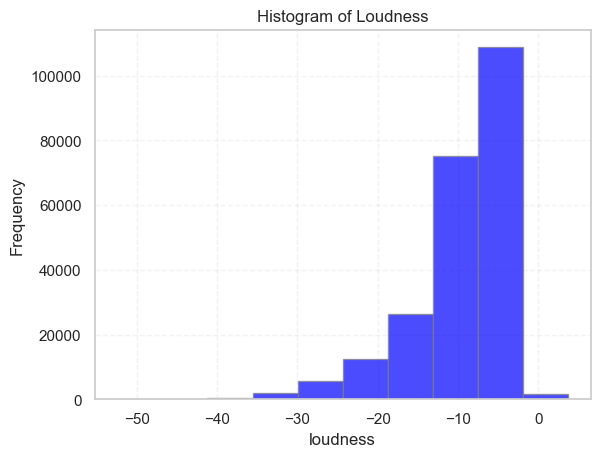

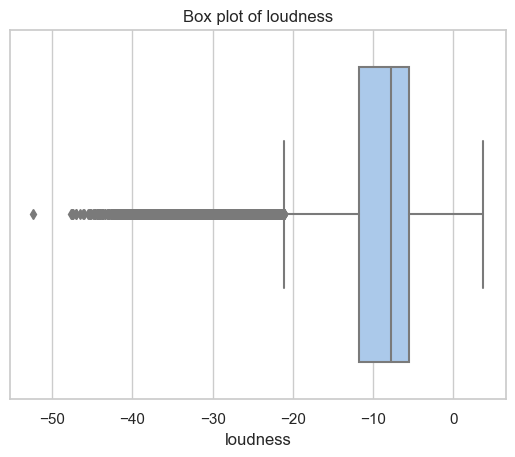

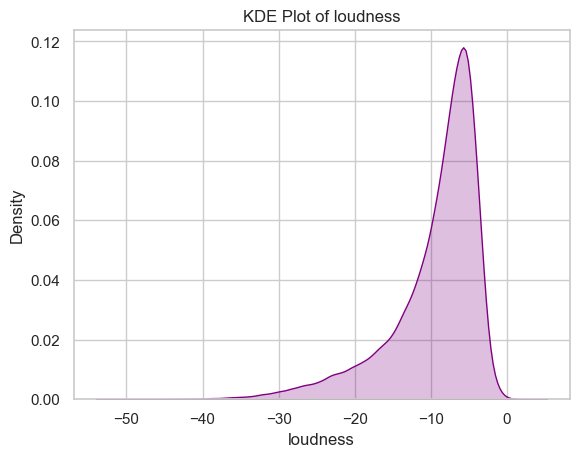

---------------------------------SPEECHINESS-------------------------------


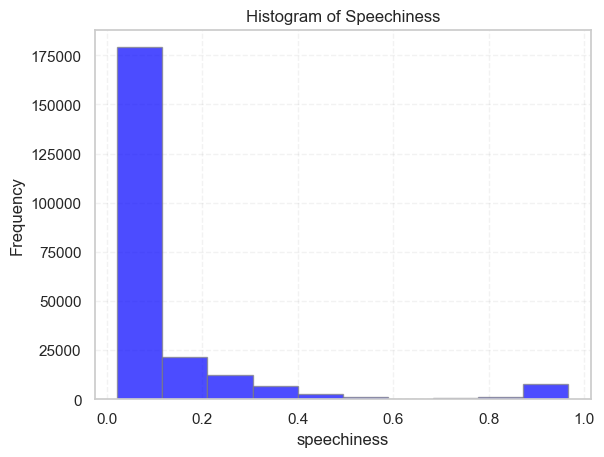

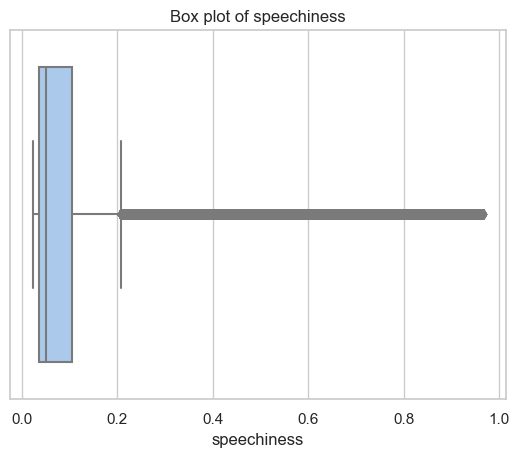

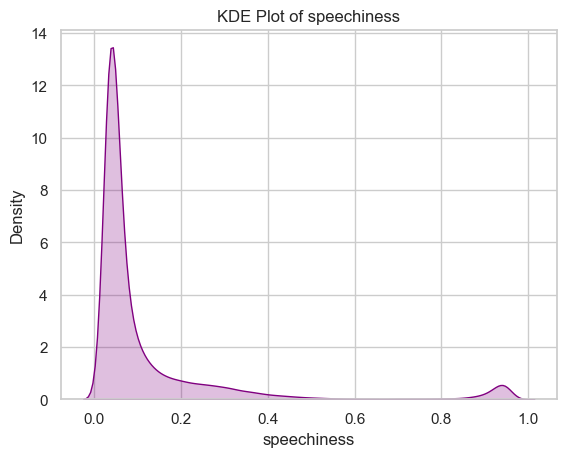

---------------------------------TEMPO-------------------------------


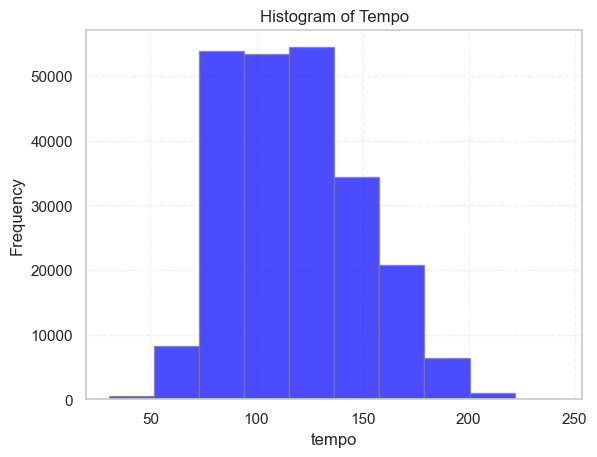

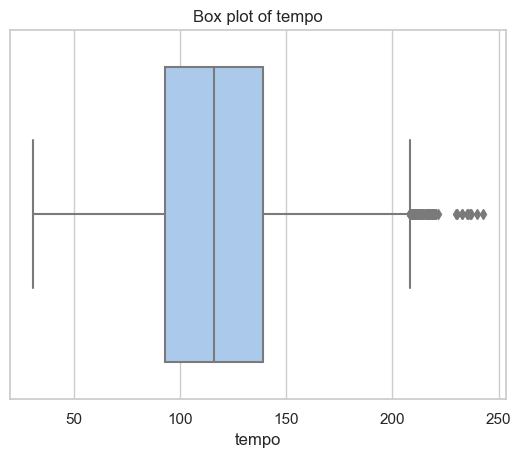

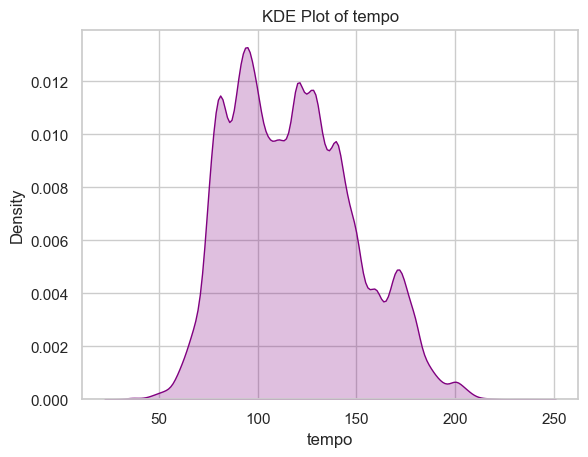

---------------------------------VALENCE-------------------------------


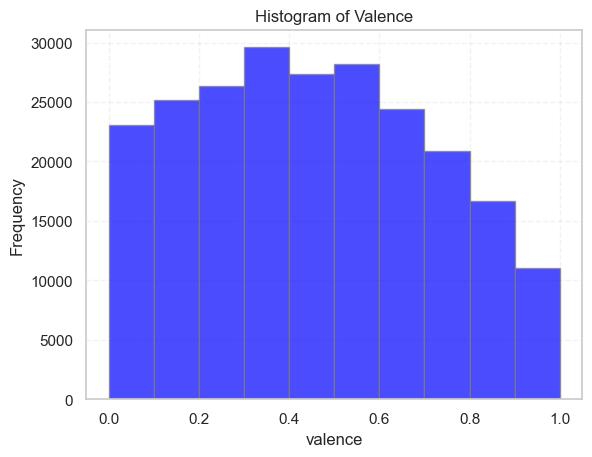

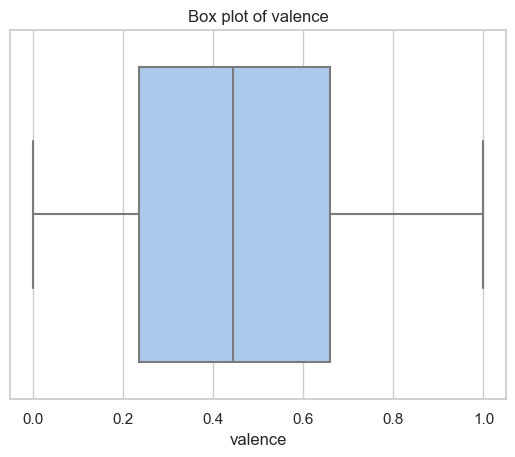

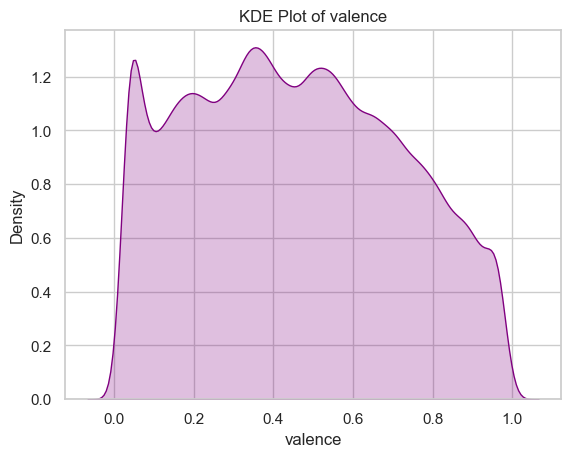

---------------------------------DURATION_SEC-------------------------------


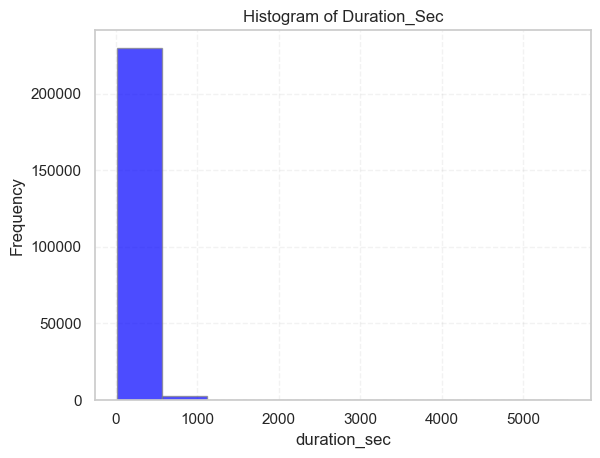

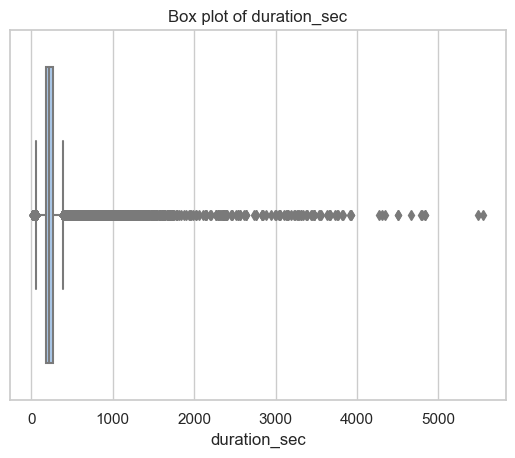

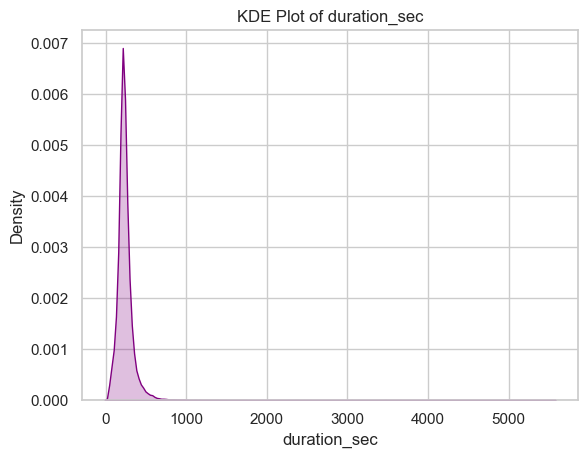

In [45]:
sns.set(style="whitegrid")
for col in data.select_dtypes(include=["int", "float"]).columns:
    print(f"---------------------------------{col.upper()}-------------------------------")
    plt.hist(data[col], bins=10, color='blue', edgecolor='gray', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {col.title()}")
    plt.grid(True, linestyle='--', alpha=0.1, color='gray')
    plt.show() 
    
    sns.boxplot(x=data[col], color='lightblue', palette='pastel')
    plt.xlabel(col)
    plt.title(f"Box plot of {col}")
    plt.show()
    
    sns.kdeplot(data[col], fill=True, color='purple')
    plt.xlabel(col)
    plt.title(f'KDE Plot of {col}')
    plt.show()

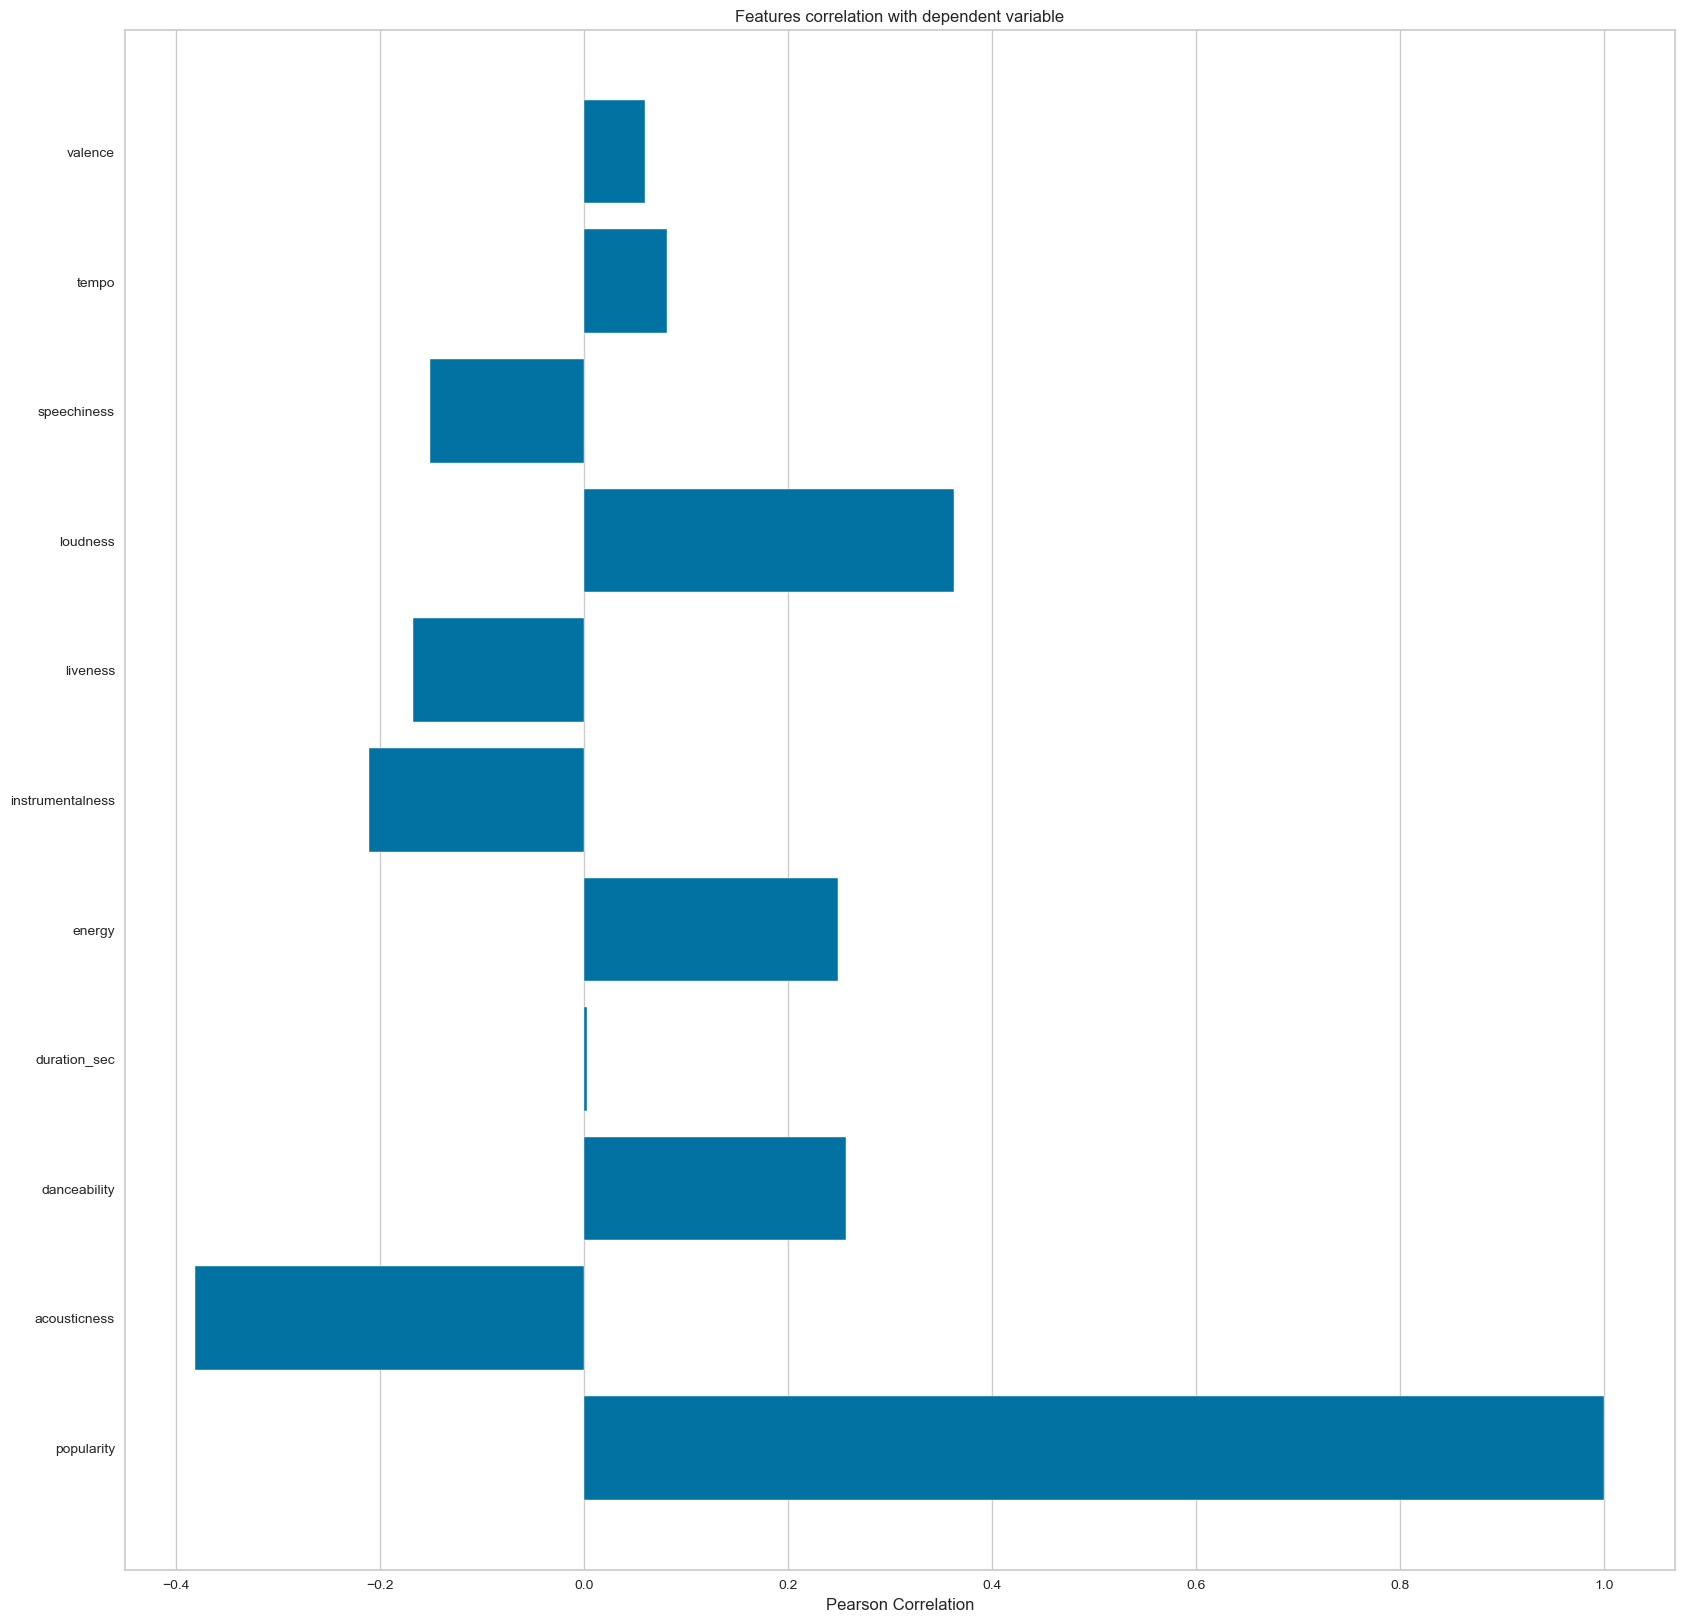

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [46]:
from yellowbrick.target import FeatureCorrelation
#Features correlation
features = ['popularity', 'acousticness', 'danceability', 'duration_sec',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo','valence']

X, y = data[features], data['popularity']

# Create a list of the feature names
features = np.array(features)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [47]:
data.head(2)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_sec
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816,137


# Model Building

In [48]:
##scaling data using standard scaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data_final = data.drop(['genre','artist_name','track_name','track_id','key','mode','time_signature'] , axis=1)
model = scaler.fit(data_final)
scaled_data = model.transform(data_final)
type(scaled_data)

numpy.ndarray

In [49]:
data_scaled = pd.DataFrame(scaled_data,columns=['loudness', 'tempo','popularity','acousticness','danceability',
      'energy','instrumentalness','liveness','speechiness','valence','duration_sec' ])
data_scaled.head()


,loudness,tempo,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,duration_sec
0,0.00,0.613454,0.356292,0.910909,0.000000,0.339614,0.900856,0.032070,0.642704,0.814,0.015168
1,0.01,0.246988,0.571934,0.737732,0.000000,0.142710,0.834469,0.068374,0.675801,0.816,0.022030
2,0.03,0.955823,0.650252,0.131113,0.000000,0.094241,0.686429,0.014818,0.325182,0.368,0.027988
3,0.00,0.705823,0.196438,0.326313,0.000000,0.089697,0.716695,0.018311,0.665238,0.227,0.024738
4,0.04,0.953815,0.294067,0.225209,0.123123,0.194208,0.557054,0.024767,0.518516,0.390,0.012279


In [50]:
 data['popularity'].nunique(), data.shape

(101, (232725, 18))

In [51]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
sns.set()


In [52]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normalization = data.select_dtypes(include=datatypes)
for col in normalization.columns:
    MinMaxScaler(col)


In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
KMeans=KMeans(n_clusters=10)
features = KMeans.fit_predict(normalization)
data['features'] = features
MinMaxScaler(data['features'])


MinMaxScaler(feature_range=0         2
1         2
2         4
3         9
4         2
         ..
232720    8
232721    8
232722    4
232723    0
232724    8
Name: features, Length: 232725, dtype: int32)

In [55]:

song_vectorizer = CountVectorizer()
song_vectorizer.fit(data['genre'])

CountVectorizer()

In [56]:
data = data.sort_values(by=['popularity'], ascending=False)
data = data.sort_values(by=['popularity'], ascending=False).head(10000)

In [57]:
def get_similarities(song_name, df):
    
    text_array1 = song_vectorizer.transform(df[df['track_name']==song_name]['genre']).toarray()
    
    num_array1 = df[df['track_name']==song_name].select_dtypes(include=np.number).to_numpy()
    
     # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in df.iterrows():
        name = row['track_name']
        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(df[df['track_name']==name]['genre']).toarray()
        
        num_array2 = df[df['track_name']==name].select_dtypes(include=np.number).to_numpy()
        
        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
    

    return sim


In [58]:
def recommend_songs(song_name, data=data):
    
    # Base case
    if data[data['track_name'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you\
         have entered invalid_name.\n Some songs you may like:\n')
        for song in data.sample(n=5)['track_name'].values:
            print(song)
        return
    data['similarity_factor'] = get_similarities(song_name, data)
    data.sort_values(by=['similarity_factor', 'popularity'],
    ascending = [False, False],
    inplace=True)
    # First song will be the input song itself as the similarity will be highest.
    print(data[['track_name', 'genre']][2:7])

In [74]:
similarity = data['similarity_factor']
print(similarity)

108133    2.000000
152332    2.000000
13603     2.000000
108893    1.999995
13883     1.999995
            ...   
166565    0.876426
166354    0.873681
67014     0.870852
67338     0.870753
67562     0.850983
Name: similarity_factor, Length: 10000, dtype: float64


In [75]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_sec,features,similarity_factor
108133,Pop,Rihanna,Love On The Brain,2aksifNn5ph8igDOkPBA02,74,0.0717,0.509,0.637,0.000011,E,0.0789,-4.830,Minor,0.0471,172.006,3/4,0.378,224,9,2.000000
152332,R&B,Rihanna,Love On The Brain,2aksifNn5ph8igDOkPBA02,74,0.0717,0.509,0.637,0.000011,E,0.0789,-4.830,Minor,0.0471,172.006,3/4,0.378,224,9,2.000000
13603,Dance,Rihanna,Love On The Brain,2aksifNn5ph8igDOkPBA02,73,0.0717,0.509,0.637,0.000011,E,0.0789,-4.830,Minor,0.0471,172.006,3/4,0.378,224,9,2.000000
108893,Pop,Beyoncé,Irreplaceable,6RX5iL93VZ5fKmyvNXvF1r,75,0.0293,0.447,0.694,0.000005,G,0.1670,-4.637,Minor,0.3820,175.868,4/4,0.509,228,9,1.999995
13883,Dance,Beyoncé,Irreplaceable,6RX5iL93VZ5fKmyvNXvF1r,75,0.0293,0.447,0.694,0.000005,G,0.1670,-4.637,Minor,0.3820,175.868,4/4,0.509,228,9,1.999995


In [ ]:
#pickle.dump(similarity,open('similarity.pkl','wb'))

In [60]:
 recommend_songs('Burning Fire')


This song is either not so popular or you         have entered invalid_name.
 Some songs you may like:

Psycho Killer - 2005 Remastered Version
Sharp Dressed Man - 2008 Remaster
Biking
Solid
All My Friends (feat. Tinashe & Chance the Rapper)


In [61]:
 recommend_songs('Love On The Brain')

               track_name  genre
13603   Love On The Brain  Dance
108893      Irreplaceable    Pop
13883       Irreplaceable  Dance
152501      Irreplaceable    R&B
109790              Crush    Pop


### we will try NearestNeighbors model also

In [62]:
data.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_sec,features,similarity_factor
108133,Pop,Rihanna,Love On The Brain,2aksifNn5ph8igDOkPBA02,74,0.0717,0.509,0.637,0.000011,E,0.0789,-4.83,Minor,0.0471,172.006,3/4,0.378,224,9,2.0


In [63]:
data.groupby('track_name')['popularity'].mean().sort_values(ascending=False).head()

track_name
7 rings                                     100.0
Wow.                                         99.0
break up with your girlfriend, i'm bored     99.0
Con Calma                                    98.0
Calma - Remix                                97.0
Name: popularity, dtype: float64

In [64]:
data.groupby('track_name')['popularity'].count().sort_values(ascending=False).head()

track_name
Alright            9
Let Me Love You    9
You                9
Dreams             8
The Reason         8
Name: popularity, dtype: int64

In [65]:
popularities = pd.DataFrame(data.groupby('track_name')['popularity'].mean())
popularities.head()

,popularity
track_name,
"""99""",69.0
"""Heroes"" - 2017 Remastered Version",75.0
$$$ - with Matt Ox,75.0
$ave Dat Money (feat. Fetty Wap & Rich Homie Quan),71.0
&burn (with Vince Staples),76.0


In [66]:
popularities['num of popularity'] =pd.DataFrame(data.groupby('track_name')['popularity'].count())
popularities.head()

,popularity,num of popularity
track_name,,
"""99""",69.0,2
"""Heroes"" - 2017 Remastered Version",75.0,2
$$$ - with Matt Ox,75.0,2
$ave Dat Money (feat. Fetty Wap & Rich Homie Quan),71.0,2
&burn (with Vince Staples),76.0,1


In [67]:
datamat = data.pivot_table(index='track_name',columns='genre',values='popularity').fillna(0)
datamat.head(10)

genre,Alternative,Blues,Children’s Music,Classical,Country,Dance,Electronic,Folk,Hip-Hop,Indie,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
track_name,,,,,,,,,,,,,,,,,,,,,
"""99""",0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0
"""Heroes"" - 2017 Remastered Version",0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0
$$$ - with Matt Ox,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,...,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$ave Dat Money (feat. Fetty Wap & Rich Homie Quan),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&burn (with Vince Staples),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Di Na Babalik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Till I Collapse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,...,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(Don't Fear) The Reaper,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0
(Fuck A) Silver Lining,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0


In [68]:
popularities.sort_values('num of popularity',ascending=False).head()

,popularity,num of popularity
track_name,,
Alright,72.000000,9
Let Me Love You,79.444444,9
You,73.666667,9
Dreams,72.750000,8
The Reason,74.500000,8


In [69]:
from scipy.sparse import csr_matrix

datamat_matrix = csr_matrix(datamat.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric ='cosine',algorithm = 'brute')
model_knn.fit(datamat_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [70]:
datamat.shape

(4499, 22)

In [71]:
query_index =np.random.choice(datamat.shape[0])
print(query_index)
distances,indices =model_knn.kneighbors(datamat.iloc[query_index,:].values.reshape(1,-1), n_neighbors=11)


3290


In [72]:
datamat.head()

genre,Alternative,Blues,Children’s Music,Classical,Country,Dance,Electronic,Folk,Hip-Hop,Indie,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
track_name,,,,,,,,,,,,,,,,,,,,,
"""99""",0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0
"""Heroes"" - 2017 Remastered Version",0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0
$$$ - with Matt Ox,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,...,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$ave Dat Money (feat. Fetty Wap & Rich Homie Quan),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&burn (with Vince Staples),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
for i in range(0,len(distances.flatten())):
    if i == 0:
        print('Recomendation for {0}:\n'.format(datamat.index[query_index]))
    else:
        print('{0}: {1}'.format(i,datamat.index[indices.flatten()[i]],distances.flatten()[i]))

Recomendation for Secreto:

1: Nadie
2: El Farsante
3: Chillax (feat. Ky-Mani Marley)
4: Me Mata
5: Baila Baila Baila
6: Criminal
7: Solo de Mi
8: Soltera
9: Me Dijeron
10: Dejate Llevar


In [ ]:
#pip install streamlit

In [ ]:
import streamlit as st
import pickle

In [ ]:
#pickle.dump(model_knn,open('model_knn.pkl','wb'))

In [ ]:
#pickle.dump(query_index,open('query_index.pkl','wb'))

In [ ]:
#pickle.dump((distances,indices),open('(distances,indices).pkl','wb'))

In [ ]:
#pickle.dump(datamat,open('datamat.pkl','wb'))

In [ ]:
#pickle.dump(data['track_name'],open('songs.pkl','wb'))

In [ ]:
#pickle.dump(data['track_name'].to_dict(),open('songs_dict.pkl','wb'))

In [ ]:
#pickle.dump(get_similarities,open('get_similarities.pkl','wb'))

In [ ]:
#pickle.dump(data,open('data.pkl','wb'))
import pickle

In [ ]:
streamlit run 

In [77]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.
